本篇记录硬件实现`tanh算法`的探究

首先是**CORDIC**在双曲空间下的算法，缺陷是
- x范围只限制在-1.1到1.1之间，超出区域需要用到查表
- 该算法略微复杂，需要特定位置的重复迭代保证收敛    

详见[这篇](https://blog.csdn.net/Pieces_thinking/article/details/83545806)  

接着是21年IEEE的一篇文章**A Novel Configurable High-precision
and Low-cost Circuit Design of
Sigmoid and Tanh Activation Function**  
tanh的二阶分段近似是  
$$
g(x) = \left\{
\begin{array}{ll}
0 & \text{,} x<-4\\
2^{-1}(1+2^{-2}x)^2 & \text{,} -4 \leq x \leq 0\\
1-2^{-1}(1+2^{-2}x)^2 & \text{,} 0 \leq x <4\\
1 & \text{,} x \geq 4\\
\end{array}
\right.
$$
使用python绘制差异曲线（浮点下的）

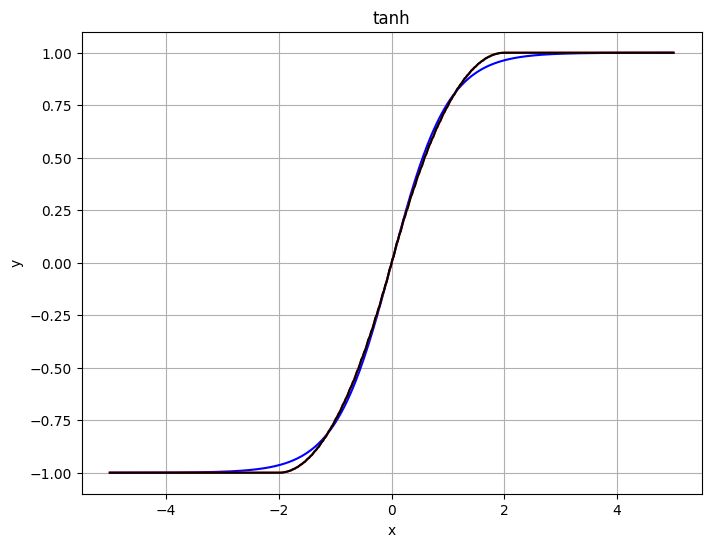

In [14]:
import numpy as np
from pathlib import Path
from fixedpoint import FixedPoint
import matplotlib.pyplot as plt
import random
import pprint
def tanh_g(x):
    if(x<=-2):
        return -1
    elif(-2<x and x<0):
        return -1+(1+0.5*x)**2
    elif(0<=x and x<2):
        return 1-(1-0.5*x)**2
    else:
        return 1
def tanh_g_fix(x):
    x     =FixedPoint(x,signed=True,m=2,n=6,str_base=2,overflow='clamp',overflow_alert='ignore') 
    one   =FixedPoint(1,signed=True,m=1,n=7,str_base=2,overflow='clamp',overflow_alert='ignore')
    m_one =FixedPoint(-1,signed=True,m=1,n=7,str_base=2,overflow='clamp',overflow_alert='ignore')
    if(float(x)<-2):
        return m_one
    elif(-2<=float(x) and float(x)<0):
        return -1+(1+0.5*x)**2
    elif(0<=float(x) and float(x)<2):
        return 1-(1-0.5*x)**2
    else:
        return one    
x  = np.linspace(-5, 5, 400)
# 计算对应的 tanh(x) 值
y1 = np.tanh(x)
y2 = np.array([tanh_g(i) for i in x])
y3 = np.array([tanh_g_fix(i) for i in x])
plt.figure(figsize=(8, 6))
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='black')
plt.title('tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show() 